# 数据下载(train和val是在不同文件夹中的)

In [6]:
# 代码来自：
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [3]:
# 数据下载
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2019-10-18 01:49:53--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.86.230.63, 99.86.230.13, 99.86.230.94, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.86.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  54.9MB/s    in 0.8s    

2019-10-18 01:49:54 (54.9 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [4]:
!unzip hymenoptera_data.zip 

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

  inflating: hymenoptera_data/train/bees/2601176055_8464e6aa71.jpg  
  inflating: hymenoptera_data/train/bees/2610833167_79bf0bcae5.jpg  
  inflating: hymenoptera_data/train/bees/2610838525_fe8e3cae47.jpg  
  inflating: hymenoptera_data/train/bees/2617161745_fa3ebe85b4.jpg  
  inflating: hymenoptera_data/train/bees/2625499656_e3415e374d.jpg  
  inflating: hymenoptera_data/train/bees/2634617358_f32fd16bea.jpg  
  inflating: hymenoptera_data/train/bees/2638074627_6b3ae746a0.jpg  
  inflating: hymenoptera_data/train/bees/2645107662_b73a8595cc.jpg  
  inflating: hymenoptera_data/train/bees/2651621464_a2fa8722eb.jpg  
  inflating: hymenoptera_data/train/bees/2652877533_a564830cbf.jpg  
  inflating: hymenoptera_data/train/bees/266644509_d30bb16a1b.jpg  
  inflating: hymenoptera_data/train/bees/2683605182_9d2a0c66cf.jpg  
  inflating: hymenoptera_data/train/bees/2704348794_eb5d5178c2.jpg  
  inflating: hymenoptera_data/train/bees/2707440199_cd170bd512.jpg  
  inflating: hymenoptera_data/train

  inflating: hymenoptera_data/val/bees/2060668999_e11edb10d0.jpg  
  inflating: hymenoptera_data/val/bees/2086294791_6f3789d8a6.jpg  
  inflating: hymenoptera_data/val/bees/2103637821_8d26ee6b90.jpg  
  inflating: hymenoptera_data/val/bees/2104135106_a65eede1de.jpg  
  inflating: hymenoptera_data/val/bees/215512424_687e1e0821.jpg  
  inflating: hymenoptera_data/val/bees/2173503984_9c6aaaa7e2.jpg  
  inflating: hymenoptera_data/val/bees/220376539_20567395d8.jpg  
  inflating: hymenoptera_data/val/bees/224841383_d050f5f510.jpg  
  inflating: hymenoptera_data/val/bees/2321144482_f3785ba7b2.jpg  
  inflating: hymenoptera_data/val/bees/238161922_55fa9a76ae.jpg  
  inflating: hymenoptera_data/val/bees/2407809945_fb525ef54d.jpg  
  inflating: hymenoptera_data/val/bees/2415414155_1916f03b42.jpg  
  inflating: hymenoptera_data/val/bees/2438480600_40a1249879.jpg  
  inflating: hymenoptera_data/val/bees/2444778727_4b781ac424.jpg  
  inflating: hymenoptera_data/val/bees/2457841282_7867f16639.jpg  

In [10]:
!cd hymenoptera_data/;pwd

/kaggle/working/hymenoptera_data


# 导入包

In [17]:
%%time
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 179 µs


# 数据强化设置（注释完毕）

In [19]:
%%time
# Data augmentation and normalization for training
# Just normalization for validation

# 下面是数据强化
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     三個通道
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# data_dir = 'data/hymenoptera_data'
data_dir='/kaggle/working/hymenoptera_data'



#读取图片数据
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}# 既有训练集又有训练集
# 注:这里的train和val其实就是文件夹的名字
# 因为确定了文件夹,所以train和val的比例也是确定的


# 读取类别标签数据
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}


dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}#数据长度
class_names = image_datasets['train'].classes#获取类别

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 48.5 ms


In [14]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 244
     Root location: /kaggle/working/hymenoptera_data/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'val': Dataset ImageFolder
     Number of datapoints: 153
     Root location: /kaggle/working/hymenoptera_data/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=PIL.Image.BILINEAR)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

# 图片显示(大部分註釋完)

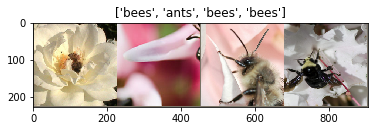

In [20]:
# Visualize a few images
# Let’s visualize a few training images so as to understand the data augmentations.


# 显示图片
# inp输入的是什么?
# ｍｅａｎ和ｓｔｄ后面的是什么意思？
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))#更換張量中每個元素的位置,詳細可以參考:
#     https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
    mean = np.array([0.485, 0.456, 0.406])#RGB的mean的設置
    std = np.array([0.229, 0.224, 0.225])#RGB的std的設置
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)#clip函數中是最小值和最大值
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
#☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)#网格

imshow(out, title=[class_names[x] for x in classes])#图像名称绘制

# 训练函数定义

In [25]:
%%time
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):#遍历epoch
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:# 每次epoch包含train和val两个结果
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)#输入数据放入GPU
                labels = labels.to(device)#输入数据放入GPU

                # zero the parameter gradients
                optimizer.zero_grad()#梯度初始化为0

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()#误差反向传播
                        optimizer.step()#梯度计算

                # statistics
                #误差统计                 
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
#------------------外层for循环-------------------------------------------------------------------------------                
            if phase == 'train':
                scheduler.step()#周期学习率   
# 下面是损失计算                
#-------------------------------------------------------------------------------------------------
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
#-------------------------------------------------------------------------------------------------
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())#这里的ｓｔａｔｅ_dict不是模型的所有數據
#可以改成保存整個模型的數據
# https://blog.csdn.net/strive_for_future/article/details/83240081
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)#这个是从内存中读取的最佳模型
    return model

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.2 µs


# 模型可视化

In [26]:
%%time
# Visualizing the model predictions
# Generic function to display predictions for a few images

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 µs


# 模型设置(註釋完畢)

In [27]:
# Finetuning the convnet
# Load a pretrained model and reset final fully connected layer.

model_ft = models.resnet18(pretrained=True)#预训练模型
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)#对预训练模型添加输出层．

model_ft = model_ft.to(device)#导入GPU

criterion = nn.CrossEntropyLoss()#交叉熵

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)#设定优化器


# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)#周期学习率

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 27.7MB/s]


# 训练(不凍結預訓練模型的權重)

In [29]:
# Train and evaluate
# It should take around 15-25 min on CPU. On GPU though, it takes less than a minute.

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5158 Acc: 0.7049
val Loss: 0.2117 Acc: 0.9020
Epoch 1/24
----------
train Loss: 0.4684 Acc: 0.7869
val Loss: 0.2180 Acc: 0.9085
Epoch 2/24
----------
train Loss: 0.5668 Acc: 0.7705
val Loss: 0.2431 Acc: 0.9150
Epoch 3/24
----------
train Loss: 0.5018 Acc: 0.7992
val Loss: 0.2236 Acc: 0.9412
Epoch 4/24
----------
train Loss: 0.3875 Acc: 0.8402
val Loss: 0.5563 Acc: 0.8301
Epoch 5/24
----------
train Loss: 0.5957 Acc: 0.8074
val Loss: 0.4598 Acc: 0.8954
Epoch 6/24
----------
train Loss: 0.4852 Acc: 0.8033
val Loss: 0.3413 Acc: 0.8824
Epoch 7/24
----------
train Loss: 0.3279 Acc: 0.8648
val Loss: 0.2939 Acc: 0.8954
Epoch 8/24
----------
train Loss: 0.3121 Acc: 0.8730
val Loss: 0.2726 Acc: 0.8889
Epoch 9/24
----------
train Loss: 0.2859 Acc: 0.8730
val Loss: 0.2592 Acc: 0.9216
Epoch 10/24
----------
train Loss: 0.2776 Acc: 0.8852
val Loss: 0.2477 Acc: 0.9085
Epoch 11/24
----------
train Loss: 0.2551 Acc: 0.9098
val Loss: 0.2277 Acc: 0.9346
Epoch 12/24
--

# 训练(凍結預訓練模型的權重,效果變差):

for param in model_conv.parameters():
    param.requires_grad = False



In [30]:
# ConvNet as fixed feature extractor
# Here, we need to freeze all the network except the final layer. We need to set requires_grad == False to 
# freeze the parameters so that the gradients are not computed in backward().

# You can read more about this in the documentation here.

model_conv = torchvision.models.resnet18(pretrained=True)#
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)#由於預訓練的模型被凍結了,所以訓練僅僅針對最後一層新增的權重.

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Epoch 0/24
----------
train Loss: 0.5658 Acc: 0.6926
val Loss: 0.2156 Acc: 0.9477
Epoch 1/24
----------
train Loss: 0.5597 Acc: 0.7377
val Loss: 0.1952 Acc: 0.9412
Epoch 2/24
----------
train Loss: 0.3994 Acc: 0.8197
val Loss: 0.1966 Acc: 0.9281
Epoch 3/24
----------
train Loss: 0.4667 Acc: 0.7705
val Loss: 0.1942 Acc: 0.9477
Epoch 4/24
----------
train Loss: 0.4534 Acc: 0.8279
val Loss: 0.1930 Acc: 0.9477
Epoch 5/24
----------
train Loss: 0.4972 Acc: 0.7582
val Loss: 0.1947 Acc: 0.9477
Epoch 6/24
----------
train Loss: 0.6185 Acc: 0.7459
val Loss: 0.3729 Acc: 0.8693
Epoch 7/24
----------
train Loss: 0.3724 Acc: 0.8484
val Loss: 0.1842 Acc: 0.9542
Epoch 8/24
----------
train Loss: 0.4187 Acc: 0.8115
val Loss: 0.2145 Acc: 0.9346
Epoch 9/24
----------
train Loss: 0.3233 Acc: 0.8525
val Loss: 0.1956 Acc: 0.9542
Epoch 10/24
----------
train Loss: 0.4171 Acc: 0.7951
val Loss: 0.2074 Acc: 0.9216
Epoch 11/24
----------
train Loss: 0.3922 Acc: 0.8156
val Loss: 0.1687 Acc: 0.9542
Epoch 12/24
--

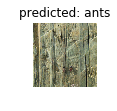

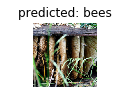

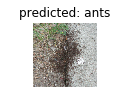

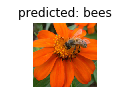

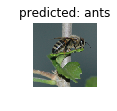

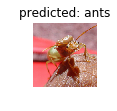

In [31]:
# Train and evaluate
# On CPU this will take about half the time compared to previous scenario. This is expected as gradients don’t need to be computed for most of the network. However, forward does need to be computed.

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)#criterion是誤差函數

visualize_model(model_conv)

plt.ioff()
plt.show()

# 结束